# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> EPA-122A *Spatial* Data Science  


## Homework 7: Points, Spatial Density Estimation

**TU Delft**<br>
**Q2 2023**<br>
**Instructor:** Trivik Verma <br>
**[Centre for Urban Science & Policy]( https://cusp.tbm.tudelft.nl/)** <br>

---



In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas, geopandas, contextily

## Task I: AirBnb distribution in Beijing

In this task, you will explore patterns in the distribution of the location of AirBnb properties in Beijing. For that, we will use data from the same provider as we did for the clustering block: [Inside AirBnb](https://insideairbnb.com). We are going to read in a file with the locations of the properties available as of August 15th. 2019:

In [2]:
url = ("http://data.insideairbnb.com/chile/rm/santiago/2023-09-22/visualisations/listings.csv")
url

'http://data.insideairbnb.com/chile/rm/santiago/2023-09-22/visualisations/listings.csv'

`Important`
Make sure you are connected to the internet when you run this cell


In [3]:
abb = pandas.read_csv(url)

This gives us a table with the following information:

In [4]:
abb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11250 non-null  int64  
 1   name                            11250 non-null  object 
 2   host_id                         11250 non-null  int64  
 3   host_name                       11250 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11250 non-null  object 
 6   latitude                        11250 non-null  float64
 7   longitude                       11250 non-null  float64
 8   room_type                       11250 non-null  object 
 9   price                           11250 non-null  int64  
 10  minimum_nights                  11250 non-null  int64  
 11  number_of_reviews               11250 non-null  int64  
 12  last_review                     

Also, for an ancillary geography, we will use the neighbourhoods provided by the same source:

In [5]:
url = ("http://data.insideairbnb.com/chile/rm/santiago/2023-09-22/visualisations/neighbourhoods.geojson")
url


'http://data.insideairbnb.com/chile/rm/santiago/2023-09-22/visualisations/neighbourhoods.geojson'


`Important`
Make sure you are connected to the internet when you run this cell


In [6]:
neis = geopandas.read_file(url)

In [7]:
neis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        32 non-null     object  
 1   neighbourhood_group  0 non-null      float64 
 2   geometry             32 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 896.0+ bytes


With these at hand, get to work with the following challenges:

* Create a Hex binning map of the property locations
* Compute and display a kernel density estimate (KDE) of the distribution of the properties
* Using the neighbourhood layer:
    * Obtain a count of property by neighbourhood (the neighbourhood name is present in the property table and you can connect the two tables through that)
    * Create a raw count choropleth
    * Create a choropleth of the density of properties by polygon
    

## Task II: Clusters of Indian cities

For this one, we are going to use a dataset on the location of populated places in India provided by [`https://geojson.xyz`](geojson.xyz). The original table covers the entire world so, to get it ready for you to work on it, we need to prepare it:



In [8]:
url = ("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/"\
       "ne_50m_populated_places_simple.geojson")
url

'https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson'



Let's read the file in and keep only places from India:

`Important`
Make sure you are connected to the internet when you run this cell

In [9]:
places = geopandas.read_file(url).query("adm0name == 'India'")

By defaul, place locations come expressed in longitude and latitude. Because you will be working with distances, it makes sense to convert the table into a system expressed in metres. For India, this can be the ["Kalianpur 1975 / India zone I"](http://epsg.io/24378) (`EPSG:24378`) projection.

In [10]:
places_m = places.to_crs(epsg=24378)

This is what we have to work with then:

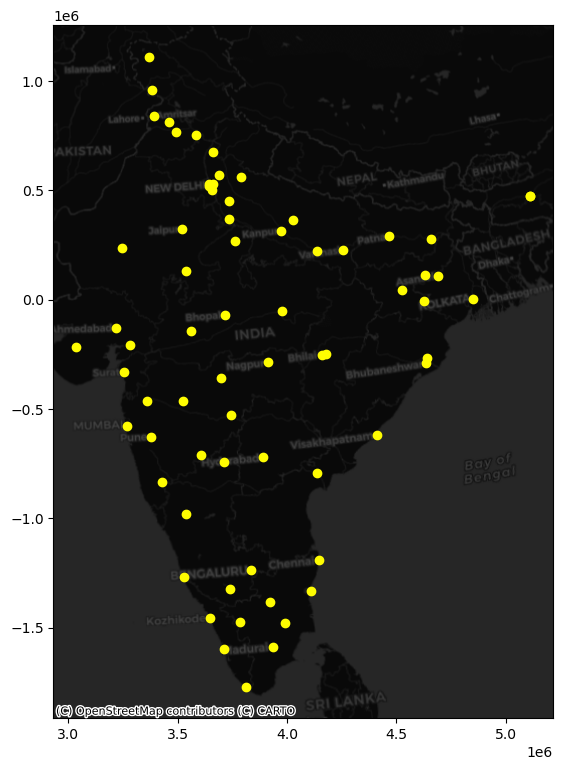

In [11]:
ax = places_m.plot(color="xkcd:bright yellow",
                 figsize=(9, 9)
                )
contextily.add_basemap(ax, 
                       crs=places_m.crs,
                       source=contextily.providers.CartoDB.DarkMatter
                      )

With this at hand, get to work:

- Use the DBSCAN algorithm to identify clusters
- Start with the following parameters: at least five cities for a cluster (`min_samples`) and a maximum of 1,000Km (`eps`)
- Obtain the clusters and plot them on a map. *Does it pick up any interesting pattern?*
- Based on the results above, tweak the values of both parameters to find a cluster of southern cities, and another one of cities in the North around New Dehli